In [577]:
%load_ext autoreload
%autoreload 2


from util import *
from another_thing import algorithm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [578]:

problem_file = 'STAGE1_3.json'
# problem_file = "TEST_K50_1.json"
timelimit = 30

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Initial best obj = 4616.837
Merged bundle1 with shop_seq [146] and bundle2 with shop_seq [191] into new bundle with shop_seq [146, 191]
New best obj after merge = 4596.188
Merged bundle1 with shop_seq [57] and bundle2 with shop_seq [9, 110] into new bundle with shop_seq [9, 57, 110]
New best obj after merge = 4585.4585
Merged bundle1 with shop_seq [116] and bundle2 with shop_seq [70, 94] into new bundle with shop_seq [116, 70, 94]
New best obj after merge = 4561.895
Merged bundle1 with shop_seq [54, 89] and bundle2 with shop_seq [84] into new bundle with shop_seq [54, 89, 84]
New best obj after merge = 4543.019
Merged bundle1 with shop_seq [73, 177] and bundle2 with shop_seq [196, 193] into new bundle with shop_seq [73, 177, 193, 196]
New best obj after merge = 4516.065
Merged bundle1 with shop_seq [119] and bundle2 with shop_seq [185, 187] into new bundle with shop_seq [185, 187, 119]
New best obj after merge = 4490.545
Merged bundle1 with shop_seq [56, 88] and bundle2 with shop_seq [

{'feasible': False,
 'infeasibility': 'Order 95 is NOT assigned!',
 'bundles': [['BIKE', [1, 33], [1, 33]],
  ['BIKE', [14, 5], [14, 5]],
  ['BIKE', [4, 44], [4, 44]],
  ['BIKE', [19, 40], [19, 40]],
  ['WALK', [6, 7], [6, 7]],
  ['WALK', [8, 2], [8, 2]],
  ['BIKE', [3, 13], [3, 13]],
  ['WALK', [27, 53], [27, 53]],
  ['BIKE', [18, 11], [18, 11]],
  ['BIKE', [34, 30], [34, 30]],
  ['BIKE', [10, 39], [10, 39]],
  ['WALK', [38, 23], [38, 23]],
  ['WALK', [21, 59], [21, 59]],
  ['BIKE', [26, 51], [26, 51]],
  ['BIKE', [32, 97], [32, 97]],
  ['WALK', [35, 61], [35, 61]],
  ['BIKE', [46, 49], [46, 49]],
  ['BIKE', [29, 93], [29, 93]],
  ['WALK', [50, 69], [50, 69]],
  ['BIKE', [0, 127], [0, 127]],
  ['BIKE', [52, 100], [52, 100]],
  ['WALK', [65, 67], [65, 67]],
  ['WALK', [76], [76]],
  ['WALK', [55], [55]],
  ['WALK', [42, 72], [42, 72]],
  ['WALK', [31], [31]],
  ['WALK', [71], [71]],
  ['WALK', [43, 128], [43, 128]],
  ['WALK', [83], [83]],
  ['WALK', [75], [75]],
  ['WALK', [136], [136

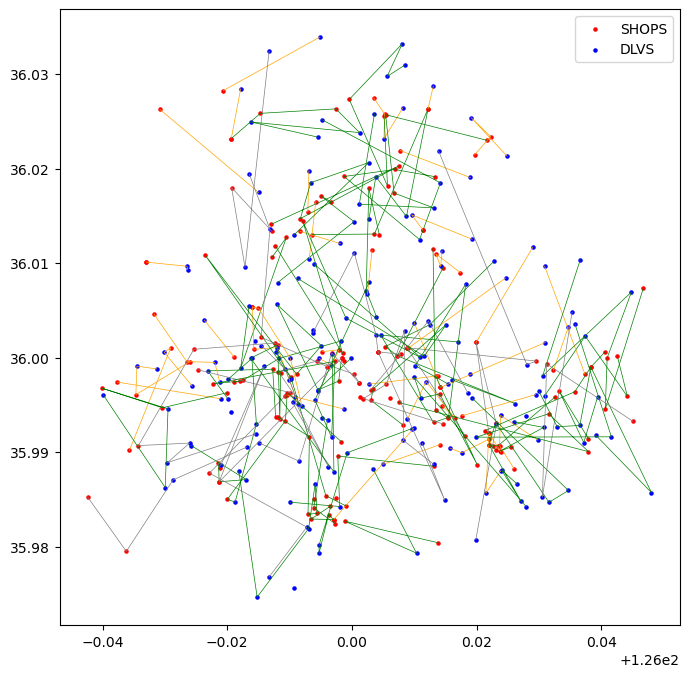

In [579]:
draw_route_solution(ALL_ORDERS, checked_solution)

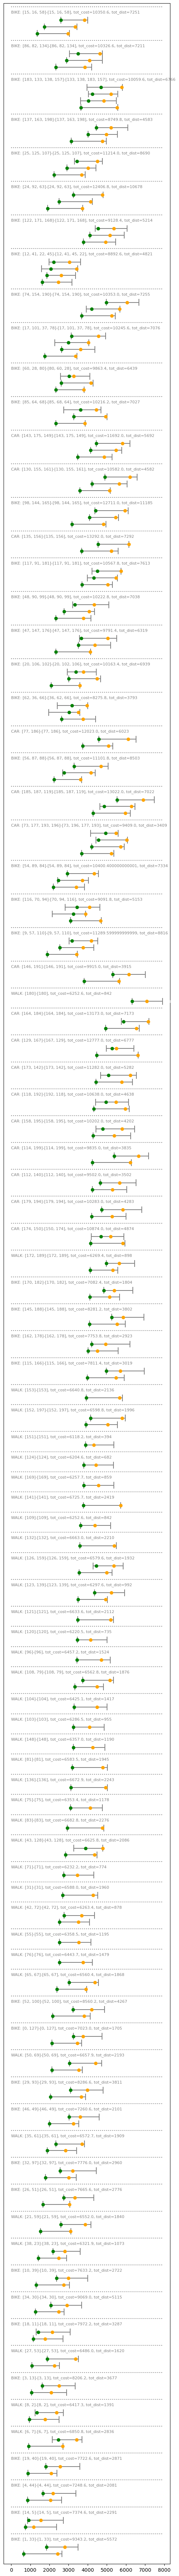

In [580]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)